# Mahanthi Rahul - AP21110011393

## Importing Libraries and Dataset

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
df = pd.read_csv("data.csv")


In [59]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


## Data PreProcessing

### Check for missing values


In [60]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64


### Check data types


In [61]:
data_types = df.dtypes
print("Data Types:\n", data_types)


Data Types:
 Constituency          object
Const. No.             int64
Leading Candidate     object
Leading Party         object
Trailing Candidate    object
Trailing Party        object
Margin                object
Status                object
dtype: object


### Handle missing values


In [62]:
df['Trailing Candidate'].fillna('Unknown', inplace=True)
df['Trailing Party'].fillna('Unknown', inplace=True)


### Check for duplicates


In [63]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


### Identify rows with invalid Margin values


In [64]:
invalid_margin_rows = df[df['Margin'] == '-']
print("Rows with invalid Margin values:\n", invalid_margin_rows)

Rows with invalid Margin values:
     Constituency  Const. No.               Leading Candidate  \
493        Surat          24  MUKESHKUMAR CHANDRAKAANT DALAL   

              Leading Party Trailing Candidate Trailing Party Margin  \
493  Bharatiya Janata Party            Unknown        Unknown      -   

          Status  
493  Uncontested  


### Replace hyphens with 0


In [65]:
df['Margin'] = df['Margin'].replace('-', '0')


### Convert Margin column to numeric (remove commas and convert to int)


In [66]:
df['Margin'] = df['Margin'].str.replace(',', '').astype(int)


### Standardize text in 'Leading Party', 'Trailing Party', and 'Status' columns


In [67]:
df['Leading Party'] = df['Leading Party'].str.strip().str.title()
df['Trailing Party'] = df['Trailing Party'].str.strip().str.title()
df['Status'] = df['Status'].str.strip().str.title()

### The cleaned dataframe


In [68]:
df.head()


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


## Analysis and Visualization

### Summary statistics


In [69]:
total_constituencies = df.shape[0]
average_margin = df['Margin'].mean()
print(f"Total Constituencies: {total_constituencies}")
print(f"Average Margin: {average_margin}")

Total Constituencies: 543
Average Margin: 162051.09576427256


### Top parties by leading candidates


In [70]:
top_parties = df['Leading Party'].value_counts().head(10)
print("\nTop Parties by Leading Candidates:\n", top_parties)


Top Parties by Leading Candidates:
 Bharatiya Janata Party                              240
Indian National Congress                             99
Samajwadi Party                                      37
All India Trinamool Congress                         29
Dravida Munnetra Kazhagam                            22
Telugu Desam                                         16
Janata Dal (United)                                  12
Shiv Sena (Uddhav Balasaheb Thackrey)                 9
Nationalist Congress Party – Sharadchandra Pawar      8
Shiv Sena                                             7
Name: Leading Party, dtype: int64


### Margin distribution


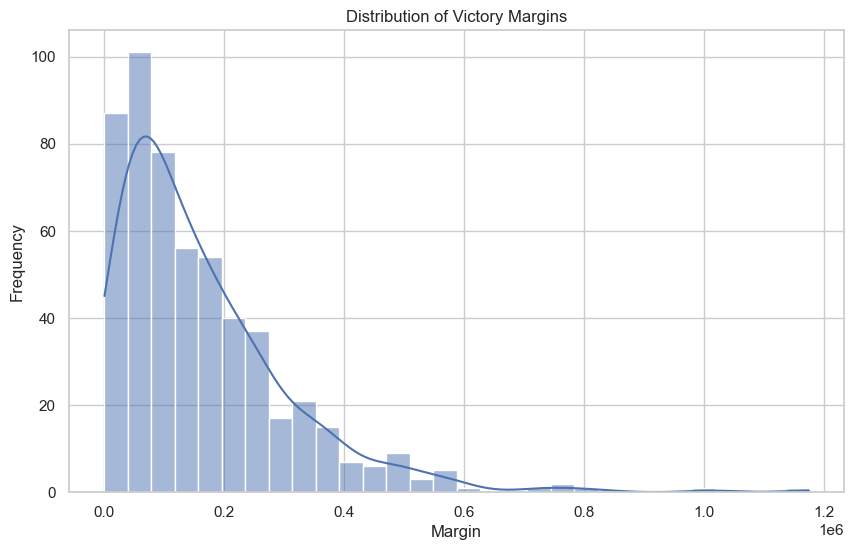

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30, kde=True)
plt.title('Distribution of Victory Margins')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

### Leading candidates with highest margins


In [72]:
top_leading_candidates = df.nlargest(10, 'Margin')[['Leading Candidate', 'Leading Party', 'Margin']]
print("\nTop Leading Candidates by Margin:\n", top_leading_candidates)



Top Leading Candidates by Margin:
          Leading Candidate                 Leading Party   Margin
221        SHANKAR LALWANI        Bharatiya Janata Party  1175092
157        RAKIBUL HUSSAIN      Indian National Congress  1012476
525  SHIVRAJ SINGH CHOUHAN        Bharatiya Janata Party   821408
384              C R PATIL        Bharatiya Janata Party   773551
186              AMIT SHAH        Bharatiya Janata Party   744716
159      ABHISHEK BANERJEE  All India Trinamool Congress   710930
513       BIPLAB KUMAR DEB        Bharatiya Janata Party   611578
529       DR. HEMANG JOSHI        Bharatiya Janata Party   582126
422      BRIJMOHAN AGRAWAL        Bharatiya Janata Party   575285
503      Sasikanth Senthil      Indian National Congress   572155


### Trailing candidates with highest margins


In [73]:
top_trailing_candidates = df.nlargest(10, 'Margin')[['Trailing Candidate', 'Trailing Party', 'Margin']]
print("\nTop Trailing Candidates by Margin:\n", top_trailing_candidates)


Top Trailing Candidates by Margin:
                            Trailing Candidate  \
221               SANJAY S/O LAKSHMAN SOLANKI   
157                  MOHAMMED BADRUDDIN AJMAL   
525                        PRATAPBHANU SHARMA   
384             NAISHADHBHAI BHUPATBHAI DESAI   
186                     SONAL RAMANBHAI PATEL   
159                       ABHIJIT DAS (BOBBY)   
513                          ASISH KUMAR SAHA   
529  PADHIYAR JASHPALSINH MAHENDRASINH (BAPU)   
422                            VIKAS UPADHYAY   
503                     Balaganapathy, V. Pon   

                        Trailing Party   Margin  
221                Bahujan Samaj Party  1175092  
157  All India United Democratic Front  1012476  
525           Indian National Congress   821408  
384           Indian National Congress   773551  
186           Indian National Congress   744716  
159             Bharatiya Janata Party   710930  
513           Indian National Congress   611578  
529           Indian Na

### Regional analysis (Assuming the constituency names contain regional information)


In [74]:
df['Region'] = df['Constituency'].apply(lambda x: x.split('-')[0] if '-' in x else 'Unknown')
region_summary = df['Region'].value_counts().head(10)
print("\nTop Regions by Number of Constituencies:\n", region_summary)



Top Regions by Number of Constituencies:
 Unknown        529
North            2
ANANTNAG         1
BHIWANI          1
Bardhaman        1
Darrang          1
Gadchiroli       1
JANJGIR          1
JHALAWAR         1
KARAULI          1
Name: Region, dtype: int64


### Performance of major parties


In [75]:
major_parties = df['Leading Party'].value_counts().head(5).index
party_performance = df[df['Leading Party'].isin(major_parties)].groupby('Leading Party')['Margin'].mean()
print("\nPerformance of Major Parties (Average Margin):\n", party_performance)


Performance of Major Parties (Average Margin):
 Leading Party
All India Trinamool Congress    169343.551724
Bharatiya Janata Party          192006.400000
Dravida Munnetra Kazhagam       230981.000000
Indian National Congress        131372.949495
Samajwadi Party                  77555.837838
Name: Margin, dtype: float64


### Status analysis


In [76]:
status_distribution = df['Status'].value_counts()
print("\nStatus Distribution:\n", status_distribution)


Status Distribution:
 Result Declared    542
Uncontested          1
Name: Status, dtype: int64


### Constituencies with smallest and largest margins


In [77]:
smallest_margins = df.nsmallest(10, 'Margin')[['Constituency', 'Leading Candidate', 'Leading Party', 'Margin']]
largest_margins = df.nlargest(10, 'Margin')[['Constituency', 'Leading Candidate', 'Leading Party', 'Margin']]
print("\nConstituencies with Smallest Margins:\n", smallest_margins)
print("\nConstituencies with Largest Margins:\n", largest_margins)


Constituencies with Smallest Margins:
           Constituency               Leading Candidate  \
493              Surat  MUKESHKUMAR CHANDRAKAANT DALAL   
357  Mumbai North West        RAVINDRA DATTARAM WAIKAR   
40            Attingal               ADV ADOOR PRAKASH   
236             Jajpur         RABINDRA NARAYAN BEHERA   
226       JAIPUR RURAL              RAO RAJENDRA SINGH   
256             KANKER                     BHOJRAJ NAG   
125         Chandigarh                   MANISH TEWARI   
207           Hamirpur             AJENDRA SINGH LODHI   
312        Lakshadweep       MUHAMMED HAMDULLAH SAYEED   
175        Farrukhabad                   MUKESH RAJPUT   

                Leading Party  Margin  
493    Bharatiya Janata Party       0  
357                 Shiv Sena      48  
40   Indian National Congress     684  
236    Bharatiya Janata Party    1587  
226    Bharatiya Janata Party    1615  
256    Bharatiya Janata Party    1884  
125  Indian National Congress    2504  
2

### Top Parties by Number of Leading Candidates
This bar plot shows the top political parties based on the number of leading candidates in the Lok Sabha election. The x-axis represents the number of leading candidates, and the y-axis lists the top parties. This visualization helps identify which parties have the most candidates leading in the elections, indicating their relative strength and popularity.


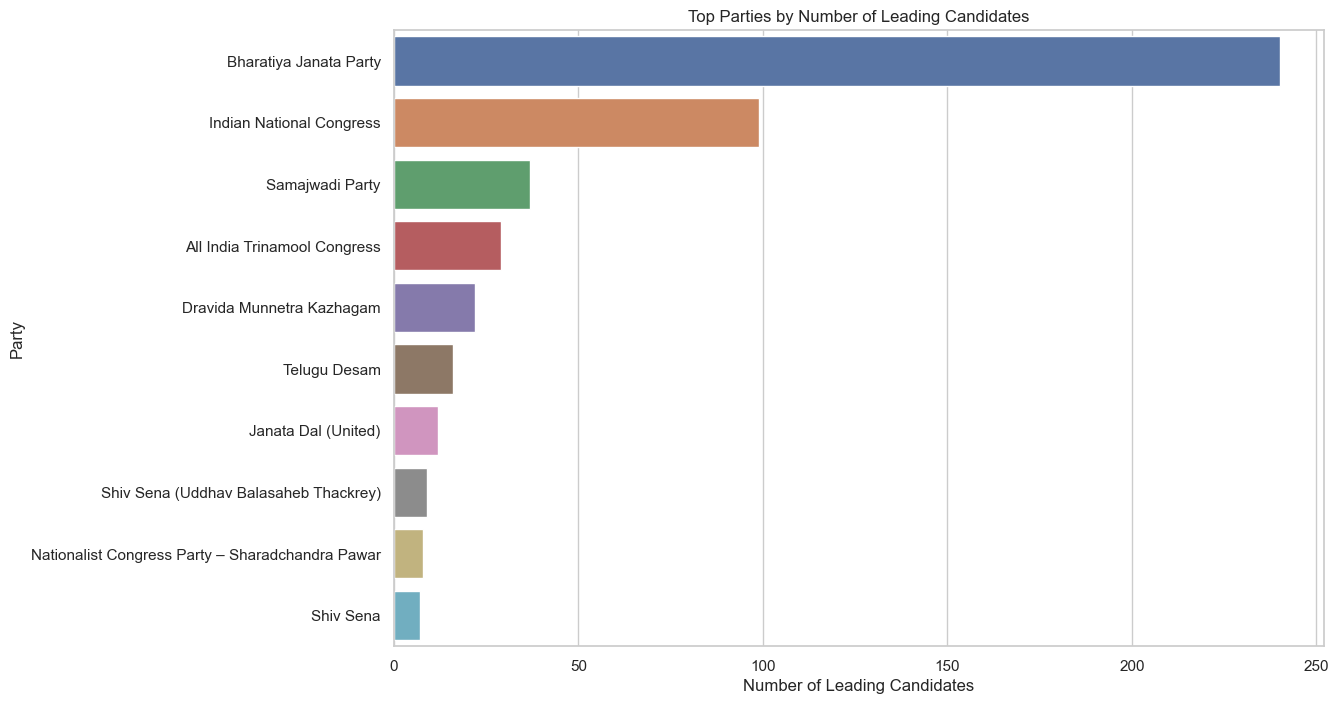

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_parties.values, y=top_parties.index)
plt.title('Top Parties by Number of Leading Candidates')
plt.xlabel('Number of Leading Candidates')
plt.ylabel('Party')
plt.show()

### Top Regions by Number of Constituencies
This bar plot displays the top regions based on the number of constituencies. The x-axis shows the number of constituencies, while the y-axis lists the regions. This visualization highlights which regions have the most constituencies, providing insights into regional distribution and potential areas of political focus.

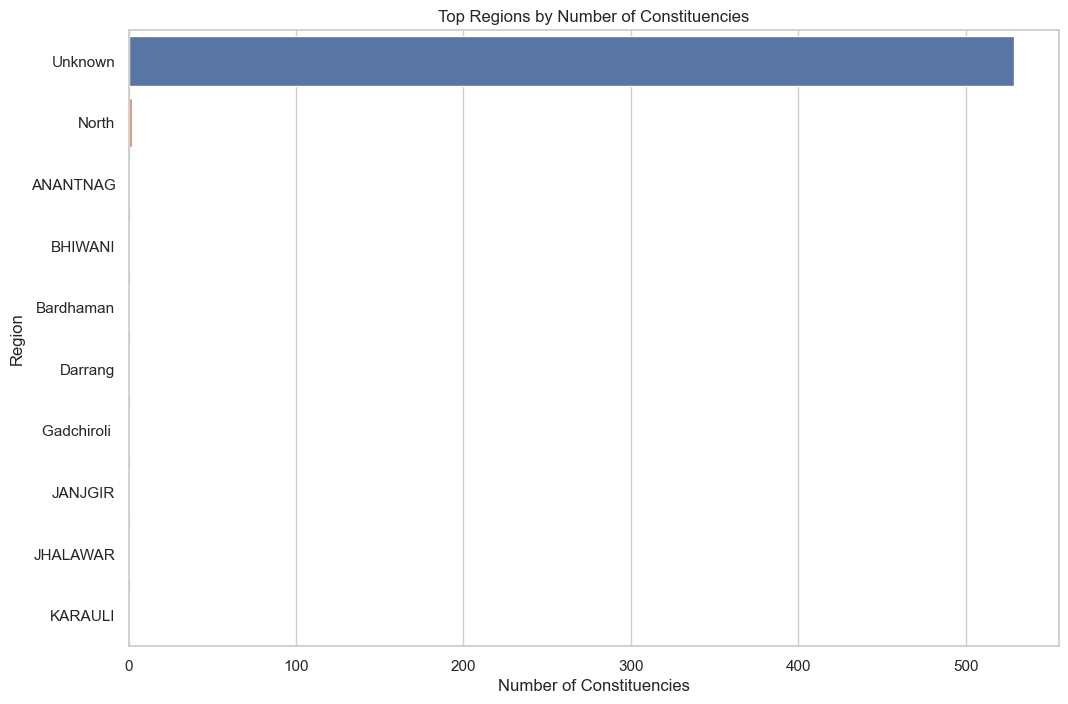

In [79]:
plt.figure(figsize=(12, 8))
sns.barplot(x=region_summary.values, y=region_summary.index)
plt.title('Top Regions by Number of Constituencies')
plt.xlabel('Number of Constituencies')
plt.ylabel('Region')
plt.show()


### Performance of Major Parties (Average Margin)
This bar plot illustrates the average margin of victory for major political parties. The x-axis represents the average margin, and the y-axis lists the parties. This visualization indicates the performance of major parties in terms of how decisively they are winning their constituencies. A higher average margin suggests stronger voter support for the party.


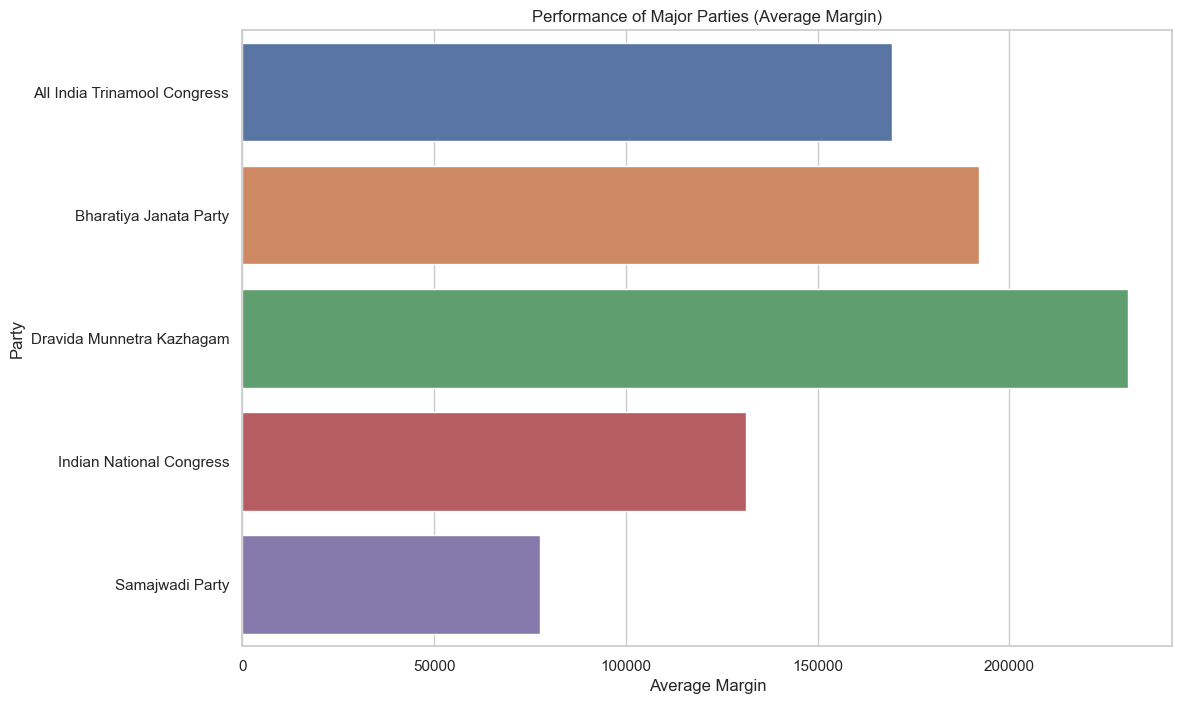

In [80]:
plt.figure(figsize=(12, 8))
sns.barplot(x=party_performance.values, y=party_performance.index)
plt.title('Performance of Major Parties (Average Margin)')
plt.xlabel('Average Margin')
plt.ylabel('Party')
plt.show()

### Status Distribution of Election Results
This count plot shows the distribution of election result statuses. The y-axis represents the different statuses (e.g., "Result Declared"), and the x-axis shows the count of constituencies with each status. This visualization provides an overview of the current status of the election results, indicating how many results have been declared and any other relevant statuses.


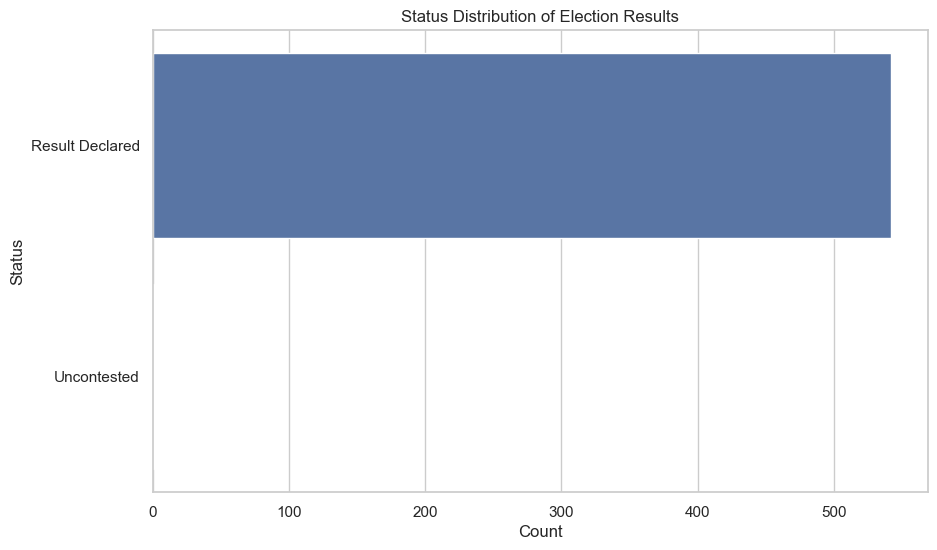

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Status', data=df, order=status_distribution.index)
plt.title('Status Distribution of Election Results')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

### Dominant Parties

The most dominant parties based on the number of seats won.

In [82]:
sns.set(style="whitegrid")

dominant_parties = df['Leading Party'].value_counts()
dominant_parties

Bharatiya Janata Party                                      240
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party Of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Indian Union Muslim League              

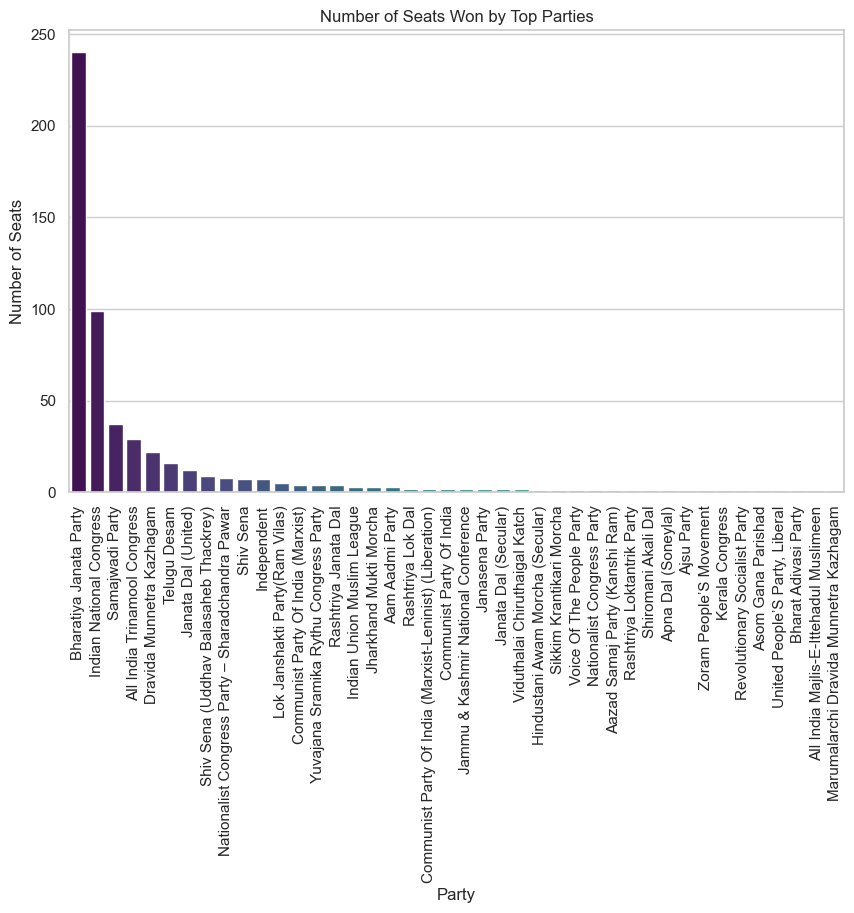

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dominant_parties.index, y=dominant_parties.values, palette="viridis")
plt.title('Number of Seats Won by Top Parties')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=90)
plt.show()

### Winning Margins
Determine the average winning margin and identify constituencies with the largest and smallest margins.

In [84]:
average_margin = df['Margin'].mean()
largest_margin = df.loc[df['Margin'].idxmax()]
smallest_margin = df.loc[df['Margin'].idxmin()]

print(f"Average Winning Margin: {average_margin:.2f}")
print(f"Largest Winning Margin:\n{largest_margin}")
print(f"Smallest Winning Margin:\n{smallest_margin}")


Average Winning Margin: 162051.10
Largest Winning Margin:
Constituency                               INDORE
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                    1175092
Status                            Result Declared
Region                                    Unknown
Name: 221, dtype: object
Smallest Winning Margin:
Constituency                                   Surat
Const. No.                                        24
Leading Candidate     MUKESHKUMAR CHANDRAKAANT DALAL
Leading Party                 Bharatiya Janata Party
Trailing Candidate                           Unknown
Trailing Party                               Unknown
Margin                                             0
Status                                   Uncontested
Region            

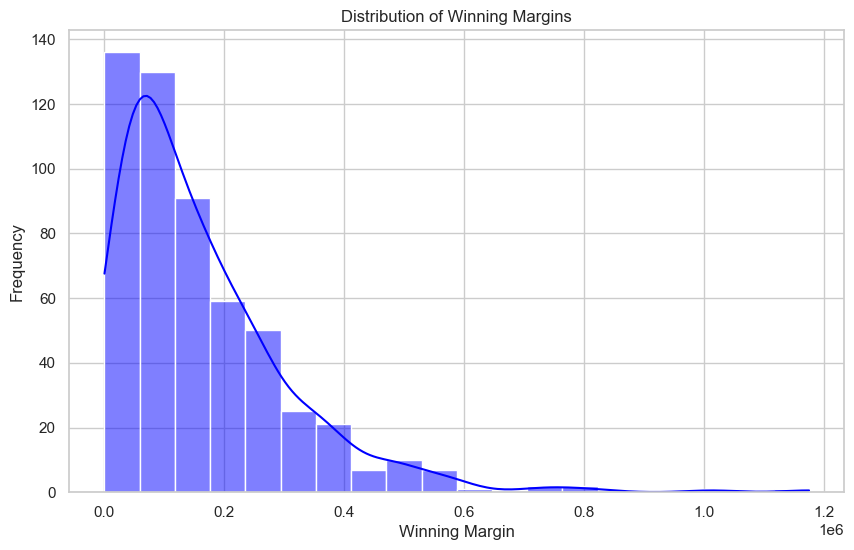

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=20, kde=True, color='blue')
plt.title('Distribution of Winning Margins')
plt.xlabel('Winning Margin')
plt.ylabel('Frequency')
plt.show()

###  Close Contests
Highlight constituencies where the margin of victory was very narrow, indicating closely fought battles.

In [86]:
close_contests = df.nsmallest(10, 'Margin')

print("Close Contests:")
print(close_contests[['Constituency', 'Leading Candidate', 'Leading Party', 'Margin']])


Close Contests:
          Constituency               Leading Candidate  \
493              Surat  MUKESHKUMAR CHANDRAKAANT DALAL   
357  Mumbai North West        RAVINDRA DATTARAM WAIKAR   
40            Attingal               ADV ADOOR PRAKASH   
236             Jajpur         RABINDRA NARAYAN BEHERA   
226       JAIPUR RURAL              RAO RAJENDRA SINGH   
256             KANKER                     BHOJRAJ NAG   
125         Chandigarh                   MANISH TEWARI   
207           Hamirpur             AJENDRA SINGH LODHI   
312        Lakshadweep       MUHAMMED HAMDULLAH SAYEED   
175        Farrukhabad                   MUKESH RAJPUT   

                Leading Party  Margin  
493    Bharatiya Janata Party       0  
357                 Shiv Sena      48  
40   Indian National Congress     684  
236    Bharatiya Janata Party    1587  
226    Bharatiya Janata Party    1615  
256    Bharatiya Janata Party    1884  
125  Indian National Congress    2504  
207           Samajwadi P

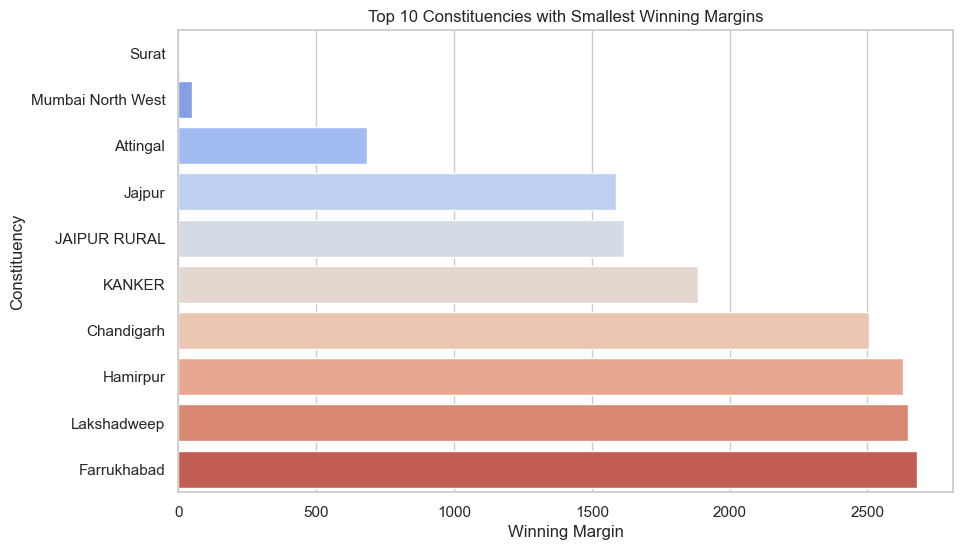

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Margin', y='Constituency', data=close_contests, palette="coolwarm")
plt.title('Top 10 Constituencies with Smallest Winning Margins')
plt.xlabel('Winning Margin')
plt.ylabel('Constituency')
plt.show()

### Geographical Distribution
Analyze the distribution of seats won by each party across different states or regions.

In [88]:
regional_distribution = df.groupby(['Constituency', 'Leading Party']).size().unstack(fill_value=0)

regional_distribution.head()

Leading Party,Aam Aadmi Party,Aazad Samaj Party (Kanshi Ram),Ajsu Party,All India Majlis-E-Ittehadul Muslimeen,All India Trinamool Congress,Apna Dal (Soneylal),Asom Gana Parishad,Bharat Adivasi Party,Bharatiya Janata Party,Communist Party Of India,...,Shiromani Akali Dal,Shiv Sena,Shiv Sena (Uddhav Balasaheb Thackrey),Sikkim Krantikari Morcha,Telugu Desam,"United People’S Party, Liberal",Viduthalai Chiruthaigal Katch,Voice Of The People Party,Yuvajana Sramika Rythu Congress Party,Zoram People’S Movement
Constituency,,,,,,,,,,,,,,,,,,,,,
AJMER,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ALWAR,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AMBALA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANANTNAG-RAJOURI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARAKKONAM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


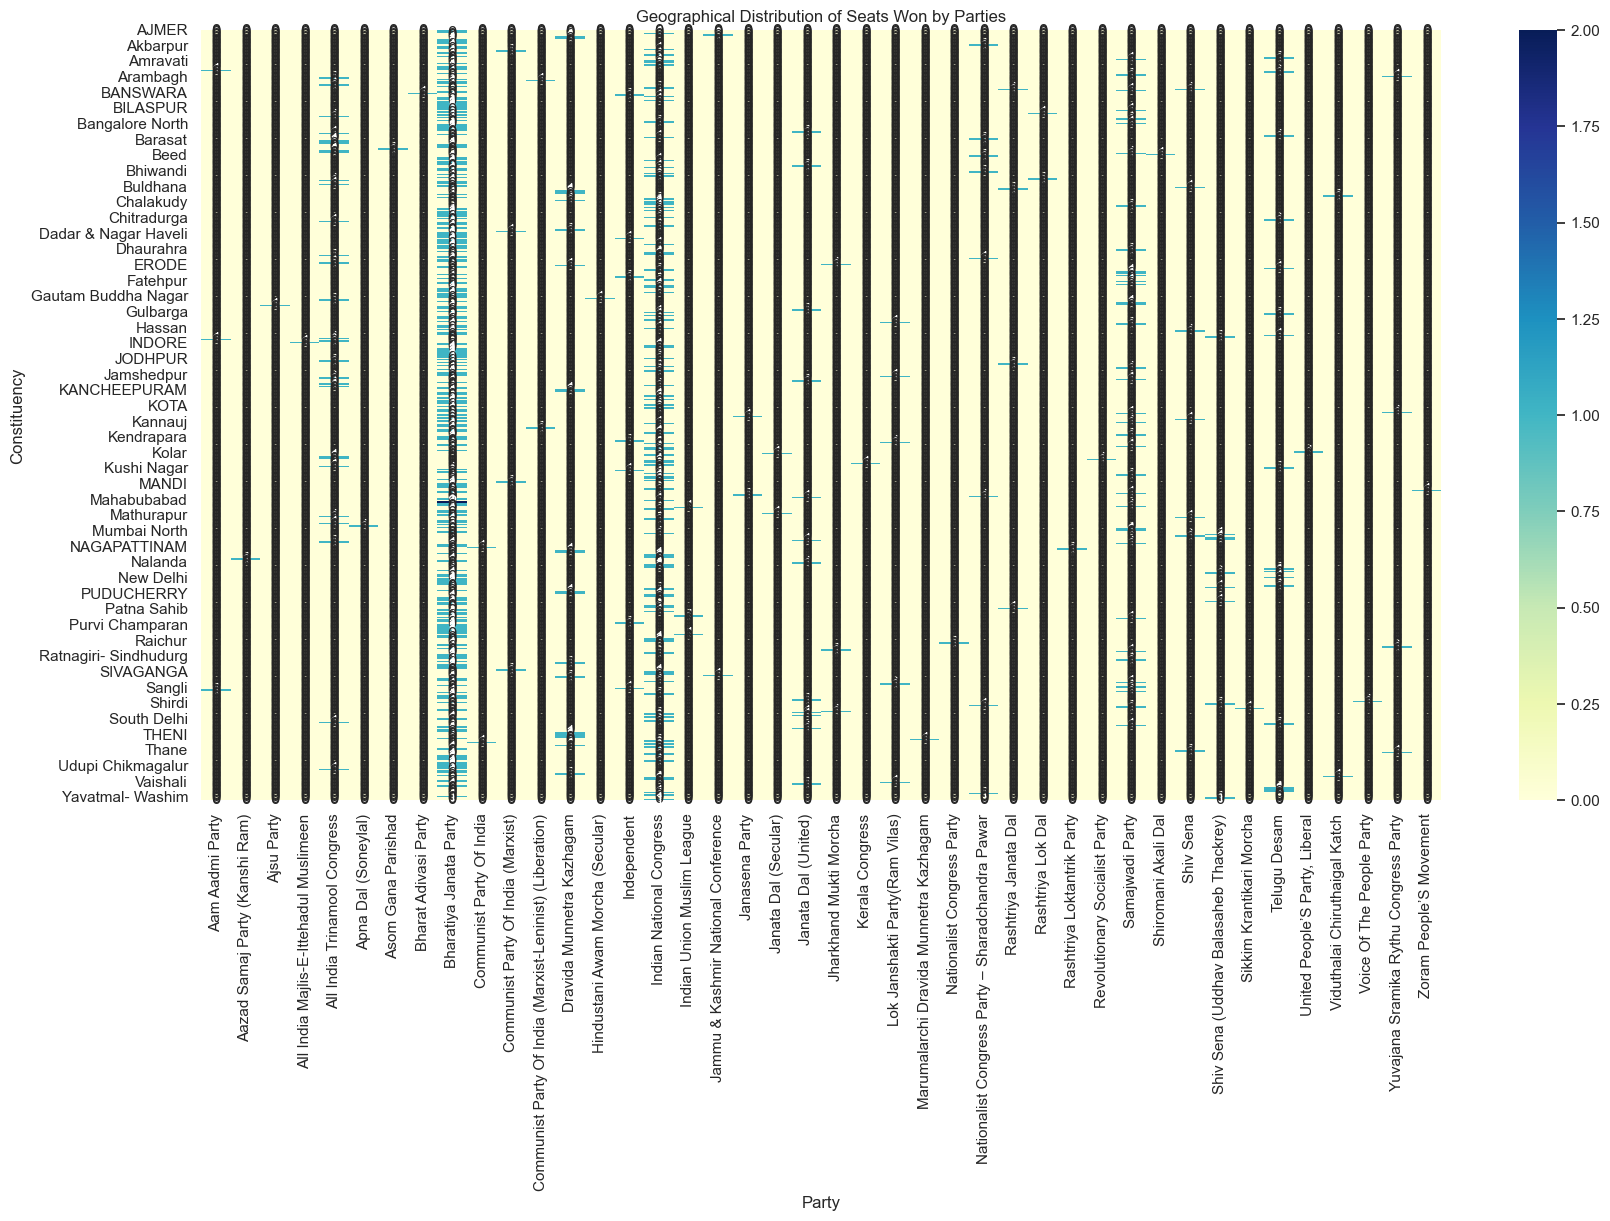

In [89]:
plt.figure(figsize=(20, 10))
sns.heatmap(regional_distribution, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Geographical Distribution of Seats Won by Parties')
plt.xlabel('Party')
plt.ylabel('Constituency')
plt.show()

### Top Candidates by Margin:
The leading candidates with the highest number of votes and their corresponding parties.

In [90]:
top_candidates = df.nlargest(10, 'Margin')[['Leading Candidate', 'Leading Party', 'Margin']]

print("Top Candidates by Margin:")
print(top_candidates)

Top Candidates by Margin:
         Leading Candidate                 Leading Party   Margin
221        SHANKAR LALWANI        Bharatiya Janata Party  1175092
157        RAKIBUL HUSSAIN      Indian National Congress  1012476
525  SHIVRAJ SINGH CHOUHAN        Bharatiya Janata Party   821408
384              C R PATIL        Bharatiya Janata Party   773551
186              AMIT SHAH        Bharatiya Janata Party   744716
159      ABHISHEK BANERJEE  All India Trinamool Congress   710930
513       BIPLAB KUMAR DEB        Bharatiya Janata Party   611578
529       DR. HEMANG JOSHI        Bharatiya Janata Party   582126
422      BRIJMOHAN AGRAWAL        Bharatiya Janata Party   575285
503      Sasikanth Senthil      Indian National Congress   572155


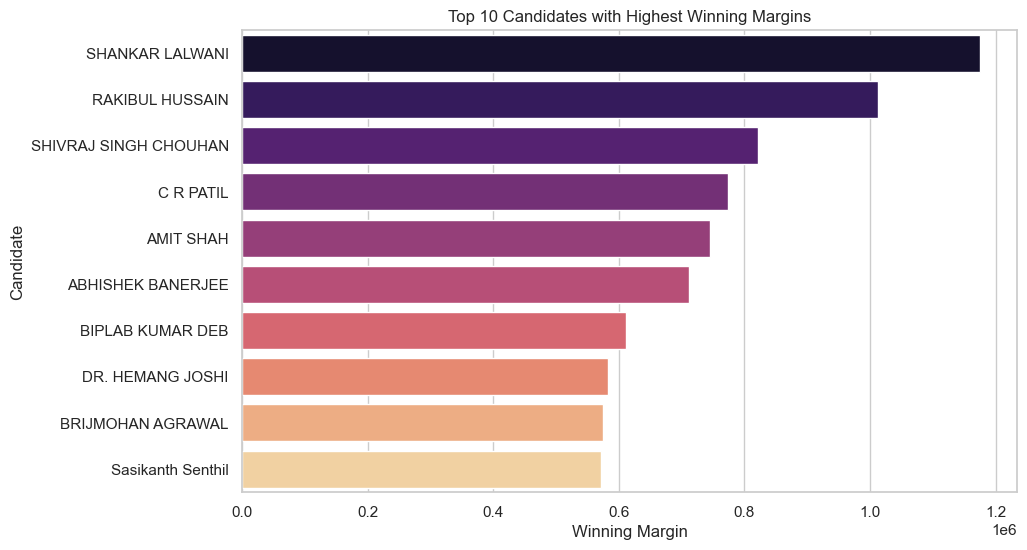

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Margin', y='Leading Candidate', data=top_candidates, palette="magma")
plt.title('Top 10 Candidates with Highest Winning Margins')
plt.xlabel('Winning Margin')
plt.ylabel('Candidate')
plt.show()


### New Faces
New candidates won their seats compared to incumbents.


In [92]:
new_faces = df['Leading Candidate'].nunique()

print(f"Number of New Faces: {new_faces}")


Number of New Faces: 542


### Strongholds
Constituencies that have consistently been won by the same party over multiple elections.


In [93]:
strongholds = df['Constituency'].value_counts()

print("Constituencies won by same party (assuming single election data):")
print(strongholds.head())


Constituencies won by same party (assuming single election data):
Maharajganj    2
Aurangabad     2
NAGAUR         1
Munger         1
Murshidabad    1
Name: Constituency, dtype: int64


### Party Performance
Compare the performance of major parties (e.g., BJP, INC) in this election to previous ones.

In [94]:
previous_election_data = {'BJP': 282, 'INC': 44, 'Others': 217}
current_election_data = dominant_parties.to_dict()


In [95]:
party_performance = pd.DataFrame([previous_election_data, current_election_data], index=['Previous', 'Current']).fillna(0)

print("Party Performance Comparison:")
print(party_performance)


Party Performance Comparison:
            BJP   INC  Others  Bharatiya Janata Party  \
Previous  282.0  44.0   217.0                     0.0   
Current     0.0   0.0     0.0                   240.0   

          Indian National Congress  Samajwadi Party  \
Previous                       0.0              0.0   
Current                       99.0             37.0   

          All India Trinamool Congress  Dravida Munnetra Kazhagam  \
Previous                           0.0                        0.0   
Current                           29.0                       22.0   

          Telugu Desam  Janata Dal (United)  ...  Apna Dal (Soneylal)  \
Previous           0.0                  0.0  ...                  0.0   
Current           16.0                 12.0  ...                  1.0   

          Ajsu Party  Zoram People’S Movement  Kerala Congress  \
Previous         0.0                      0.0              0.0   
Current          1.0                      1.0              1.0   

     

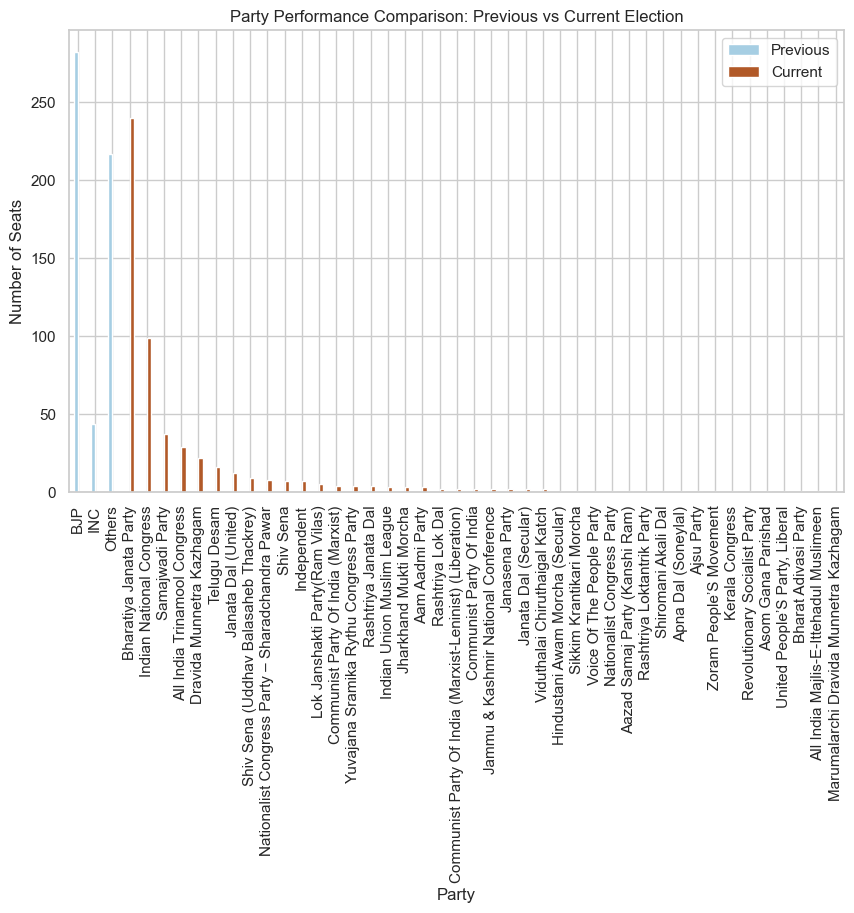

In [96]:
party_performance.T.plot(kind='bar', figsize=(10, 6), colormap='Paired')
plt.title('Party Performance Comparison: Previous vs Current Election')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.show()
